# Spectra and Fundamental Frequencies

In [4]:
%matplotlib widget
import pychaoson.calculate_chaos as calc_chaos
import pychaoson.gui.control_gui as control_gui
import pychaoson.pychaoson as pychaoson
import pychaoson.gui.param_space_gui as param_space_gui
import pychaoson.chaotic_systems as chaotic_systems
import pychaoson.sc_helper as sc_helper
import pychaoson.sensitivity_calibration as sensitivity_calibration
import pychaoson.sliders as sliders
import numpy as np
from itertools import product
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from itertools import product
from tqdm import tqdm
from matplotlib.colorbar import Colorbar
import matplotlib as mpl

In [2]:
# implementation of the maps for further time series computation

def logistic_map(r, x0, n):
    series = [x0]
    for i in range(0, n-1):
        x_next = r * series[-1] * (1 - series[-1])
        series.append(x_next)
    return series

def henon_map(a, b, x0, x1, n):
    series = [x0, x1]
    for i in range(0, n-1):
        x_next = 1 - a * series[-1]**2 + b * series[-2]
        series.append(x_next)
    return series

def quadratic_map(a, b, c, x0, n):
    series = [x0]
    for i in range(0, n-1):
        x_next = a * series[-1]**2 + b * series[-1] + c
        series.append(x_next)
    return series

### Spectra logistic map

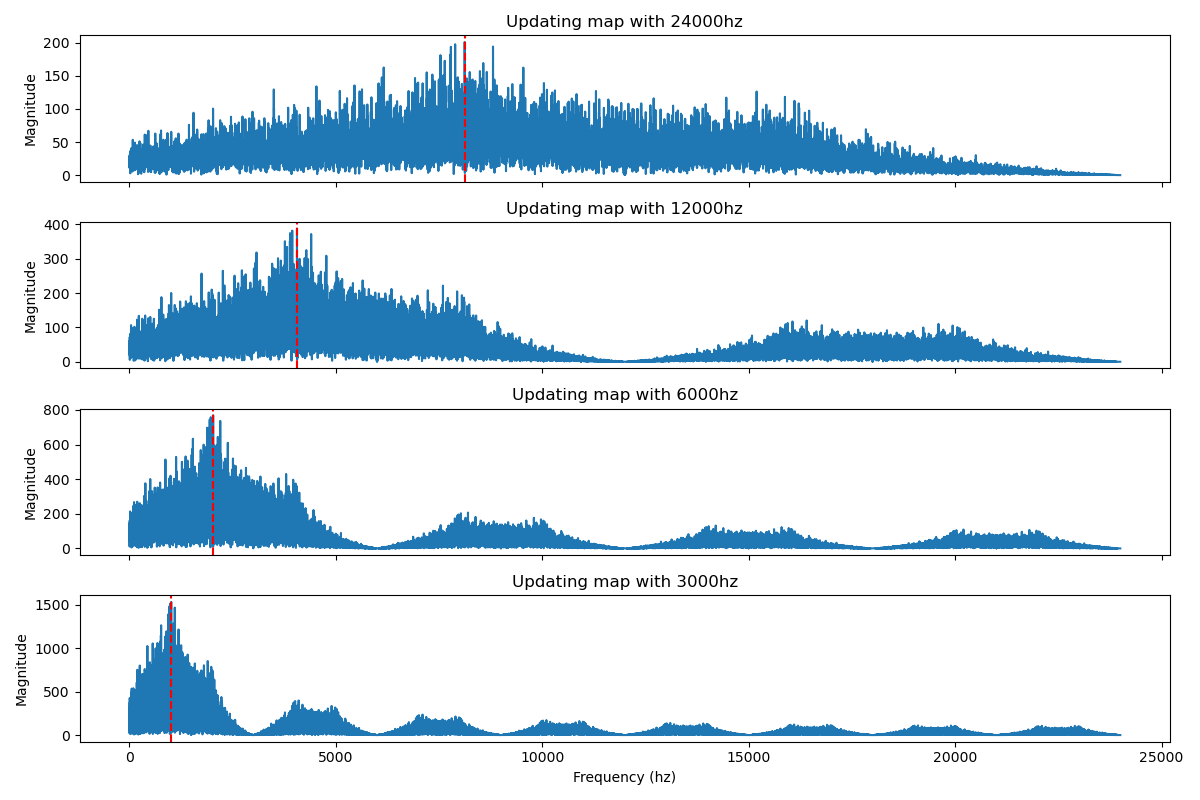

In [3]:

sample_rate = 48000
divisions = [2,4,8,16] #28000, 14000, 7000, 3500 sampling speed of map
time_series_len = 10000
time_series = logistic_map(3.95, 0.5, time_series_len)
fig, axes = plt.subplots(nrows=len(divisions), ncols=1, figsize=(12, 8), sharex=True)

sample_plot = 0
# for every sampling speed one plot
for division in divisions:
    resampled_time_series = []
    for elem in time_series:
        resampled_time_series += [elem] * division
    resampled_time_series[:time_series_len]
    # compute fourier and the frequencies for the sample rate
    fft_result = np.fft.fft(resampled_time_series)
    frequency_values = np.fft.fftfreq(len(fft_result), 1 / sample_rate)
    # only use one side of the spectrum
    frequencies = frequency_values[1:len(frequency_values) // 2]
    spectrum = np.abs(fft_result[1:len(frequency_values) // 2])

    max_frequency = frequencies[np.argmax(spectrum)]
    axes[sample_plot].set_title("Updating map with {}hz".format(int(sample_rate/division)))
    axes[sample_plot].set_ylabel('Magnitude')
    axes[sample_plot].plot(frequencies, spectrum)
    axes[sample_plot].axvline(x=max_frequency, color='red', linestyle='--')
    sample_plot += 1 

axes[sample_plot-1].set_xlabel('Frequency (hz)')
fig.tight_layout()
plt.show()

### Sound r=3.9 vs sin with same f_0

In [ ]:
TODO

### Fundamental frequency for parameter space

 15%|██████▎                                   | 30/200 [01:23<07:52,  2.78s/it]/var/folders/d5/mnx609gj2v9c9yfwqc16_0vm0000gp/T/ipykernel_6750/1853123320.py:11: RuntimeWarning: overflow encountered in scalar power
  x_next = 1 - a * series[-1]**2 + b * series[-2]
 43%|██████████████████                        | 86/200 [03:58<05:14,  2.76s/it]/var/folders/d5/mnx609gj2v9c9yfwqc16_0vm0000gp/T/ipykernel_6750/1853123320.py:11: RuntimeWarning: overflow encountered in scalar multiply
  x_next = 1 - a * series[-1]**2 + b * series[-2]
 47%|███████████████████▋                      | 94/200 [04:20<04:53,  2.77s/it]/var/folders/d5/mnx609gj2v9c9yfwqc16_0vm0000gp/T/ipykernel_6750/1853123320.py:11: RuntimeWarning: invalid value encountered in scalar add
  x_next = 1 - a * series[-1]**2 + b * series[-2]
  0%|                                                   | 0/200 [00:00<?, ?it/s]/var/folders/d5/mnx609gj2v9c9yfwqc16_0vm0000gp/T/ipykernel_6750/1853123320.py:18: RuntimeWarning: overflow encountered 

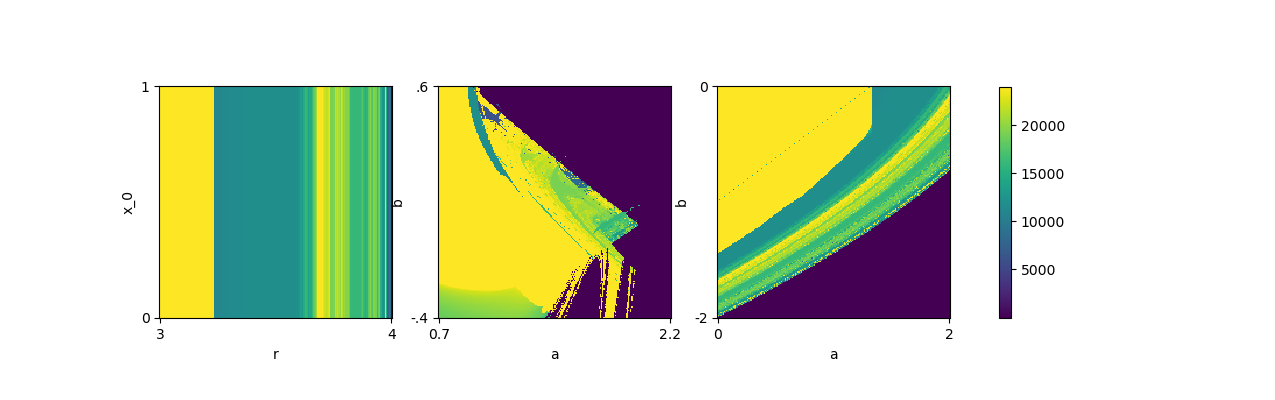

In [13]:
time_series_len = 48000
points = 200
max_freq_array = np.zeros((3, points, points))
sampling_rate = 48000

rs = np.linspace(3,4,points)
xs = np.linspace(0,1,points)
for i in tqdm(range(len(rs))):
    for j in range(len(xs)):
        x = xs[j]
        r = rs[i]
        #compute time series for every point in the linspaced parameter space
        time_series = logistic_map(r, 0.5, time_series_len)
        fft_result = np.fft.fft(time_series)
        frequency_values = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
        # only positive frequencies and no dc
        positive_frequencies = frequency_values[1:len(frequency_values) // 2]
        positive_spectrum = np.abs(fft_result[1:len(frequency_values) // 2])
        max_freq_array[0,i,j] = positive_frequencies[np.argmax(positive_spectrum)]


a_s = np.linspace(0.7,2.2,points)
b_s = np.linspace(-0.4,0.6,points)
for i in tqdm(range(len(a_s))):
    for j in range(len(b_s)):
        b = b_s[j]
        a = a_s[i]
        #compute time series for every point in the linspaced parameter space
        time_series = henon_map(a, b, 0, 1, time_series_len)
        fft_result = np.fft.fft(time_series)
        frequency_values = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
        # only positive frequencies and no dc
        positive_frequencies = frequency_values[1:len(frequency_values) // 2]
        positive_spectrum = np.abs(fft_result[1:len(frequency_values) // 2])
        max_freq_array[1, i,j] = positive_frequencies[np.argmax(positive_spectrum)]
        
a_s = np.linspace(0,2,points)
b_s = np.linspace(-2,0,points)
for i in tqdm(range(len(a_s))):
    for j in range(len(b_s)):
        b = b_s[j]
        a = a_s[i]
        #compute time series for every point in the linspaced parameter space
        time_series = quadratic_map(a, b,  -0.75, 0, time_series_len)
        fft_result = np.fft.fft(time_series)
        frequency_values = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
        # only positive frequencies and no dc
        positive_frequencies = frequency_values[1:len(frequency_values) // 2]
        positive_spectrum = np.abs(fft_result[1:len(frequency_values) // 2])
        max_freq_array[2, i,j] = positive_frequencies[np.argmax(positive_spectrum)]


# plot results
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12.75,4))
im = axs[0].imshow(np.swapaxes(max_freq_array[0],0,1), cmap='viridis', interpolation='nearest', origin='lower', vmin=1, vmax=24000)
axs[0].set_xticks(ticks=[0, points-1], labels=['3', '4'])
axs[0].set_yticks(ticks=[0, points-1], labels=['0', '1'])
axs[0].set_aspect('equal')
axs[0].set_xlabel('r')
axs[0].set_ylabel('x_0')
im = axs[1].imshow(np.swapaxes(max_freq_array[1],0,1), cmap='viridis', interpolation='nearest', origin='lower', vmin=1, vmax=24000)
axs[1].set_xticks(ticks=[0, points-1], labels=['0.7', '2.2'])
axs[1].set_yticks(ticks=[0, points-1], labels=['-.4', '.6'])
axs[1].set_aspect('equal')
axs[1].set_xlabel('a')
axs[1].set_ylabel('b')
im = axs[2].imshow(np.swapaxes(max_freq_array[2],0,1), cmap='viridis', interpolation='nearest', origin='lower', vmin=1, vmax=24000)
axs[2].set_xticks(ticks=[0, points-1], labels=['0', '2'])
axs[2].set_yticks(ticks=[0, points-1], labels=['-2', '0'])
axs[2].set_aspect('equal')
axs[2].set_xlabel('a')
axs[2].set_ylabel('b')
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.75)

# Display the heatmap
#ig.tight_layout()
plt.show()

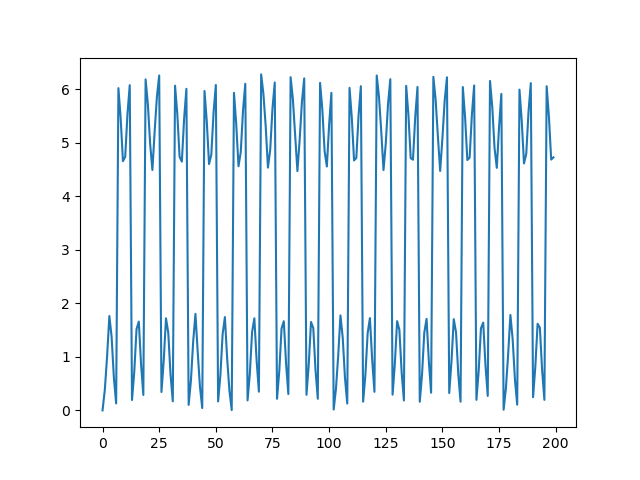

In [10]:
import numpy as np
p = 0
t = 0.5
K = 0.8
p_iterated = []
for i in range(200):
    p_iterated.append(p)
    p = (p + K * np.sin(t)) % (2 * np.pi)
    t = (t + p) % (2 * np.pi)

plt.figure()
plt.plot(list(range(200)), p_iterated)
